# Machine Learning
- Extract knowledge from data
- Learn from data
  

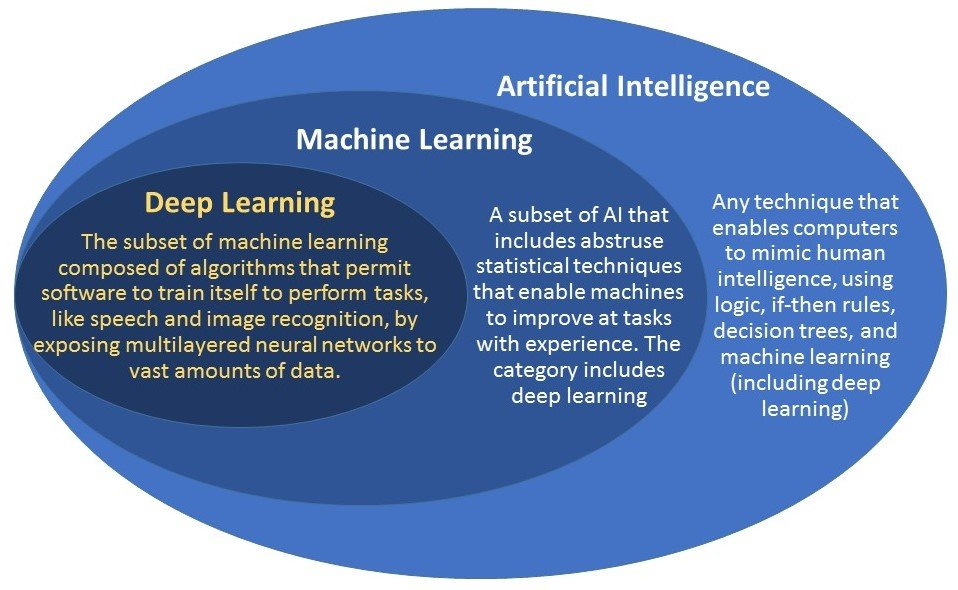

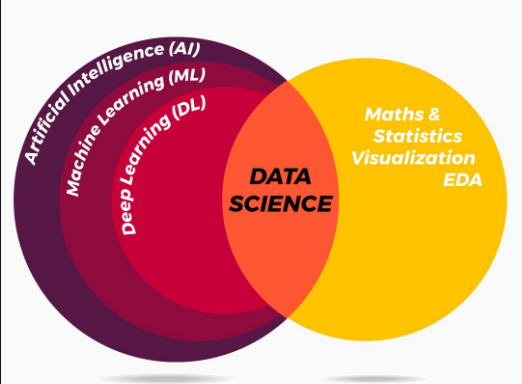

## Applications
  * email filtering
  * self-driving car
  * online recomendation offers
  * fraud detection
  * identifying cancer tumors  
  * face recognition  
  * speech recognition
  * search engines
  * analyzing DNA sequences


## Types of Machine Learning Algortihms

* Supervised Learning
    * Trained on labeled data (output is given)
    * Tasks
      * Classification
      * Regression
    * ALgorithms
      *Linear Regression
      * Logistic Regression
      * Decision Trees
      * SVM
      * Neural Networks
    * Examples:
      * spam filter
      * fraud detection
      * tumor detection
* Unsupervised Learning
    * No label (output)
    * Group samples according to similarities, patterns and differences.
    * Tasks
      * Clustering
      * Anomaly and Novelty Detection
      * Visualization
      * Dimension Reduction
    * Algorithms
      * k-means
      * PCA
    * Examples:
      * Customer Segmentation
      * Identifying topics in a textual data
* Reinforcement Learning
    * Reward wanted actions
    * Punishing unwabted actions
    * Examples:
        * Games
        * Self-driving cars
        * Robotics


## Data
- Sample (Instance) : row         
- Feature (Attribute):  column

## Data Processing
90% of a data science projects  
- Understand the domain
- Data source
- Wrangling and extracting data
- Cleaning the data

## Split Data
  - Training Set
    - train the model
  - Test Set
    - unseen data
    - check the perfromance

## Generalization
(in Supervised learning algorithms)

* build a model on the training data

* make predictions on test data
  * If test score is high:  model **generalizes** from the training set to the test set

* Aim: build a model that is able to generalize as accurately as possible

**overfitting**
* training score is high , test score is low
* model is too complex for the data
* memorize the data
* Solution: simplify the model

**underfitting**
* training score is low
* model does not learn
* model is too simple or inappropriate for the data

**Warning**  
There is a **trade-off** between overfitting and underfitting

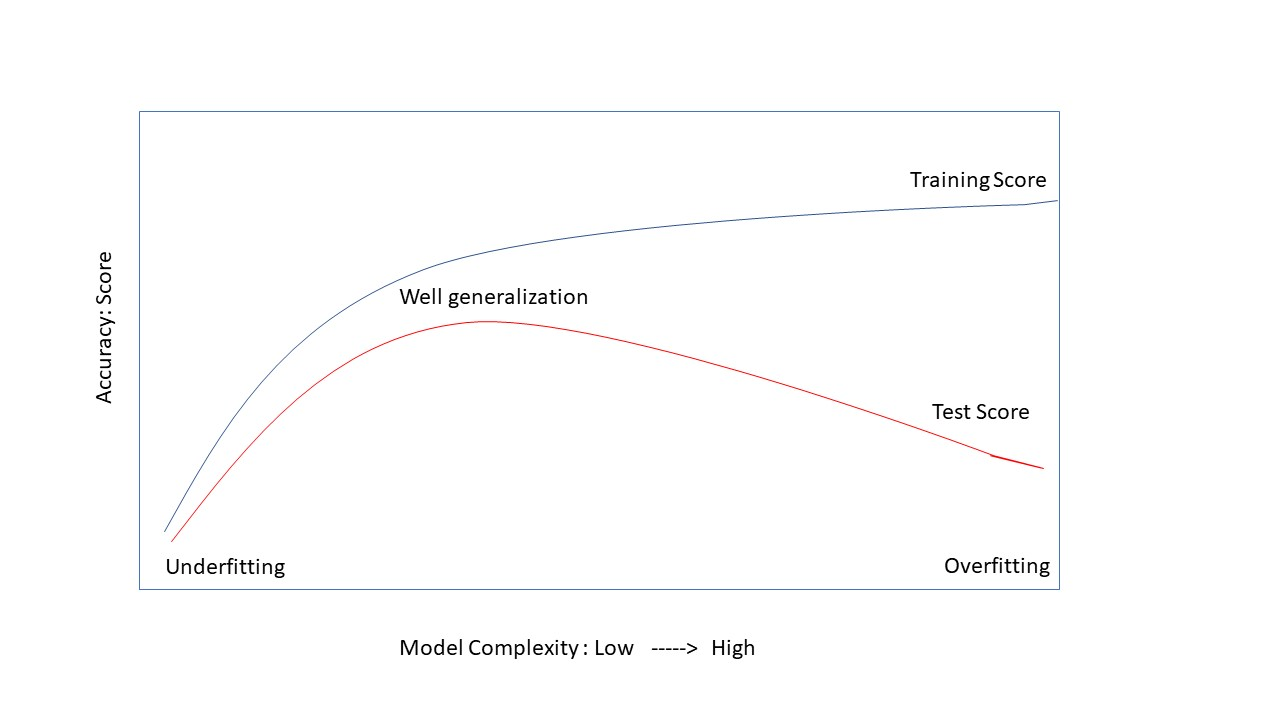

## Overfitting and Underfitting

How to overcome overfitting:
* Simplify the model
    * Choose a simple model
    * Reduce the number of features in the training data  
    * Regularization (reterict the model) (hypertuning)
* Use more training data
* To reduce the noise in the training data
    * improve the data
    * remove outliers

How to overcome underfitting:
* Use a more complex model
* Use better features
* Reduce the constraints (hypertuning)

## Visualization
- Simple (Linear Model) versus Complex (Polynomial Model)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
noise = np.random.randn(20)/3

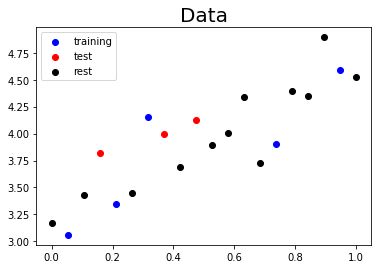

In [ ]:
x = np.linspace(0,1,20)
y = 2*x+3+noise

x_train = np.array([x[i] for i in [1,4,6,14,18]])
y_train = np.array([y[i] for i in [1,4,6,14,18]])

x_test  = np.array([x[i] for i in [3,7,9]])
y_test  = np.array([y[i] for i in [3,7,9]])

x_rest  = np.array([x[i] for i in set(range(20))-(set([1,4,6,14,18]) | set([3,7,9]) )])
y_rest  = np.array([y[i] for i in set(range(20))-(set([1,4,6,14,18]) | set([3,7,9]) )])

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')
plt.title('Data', fontsize=20)
plt.legend();

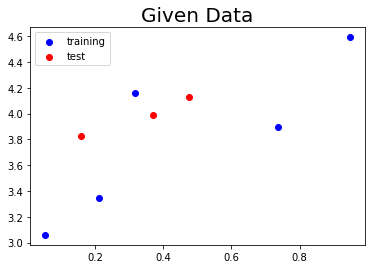

In [ ]:
plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.title('Given Data', fontsize=20)
plt.legend();

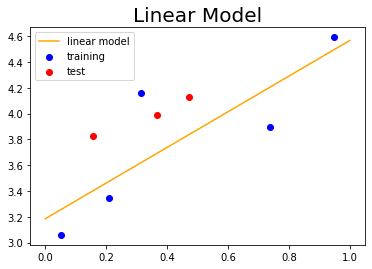

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1,1),y_train)
y_l = lin_reg.predict(x.reshape(-1,1))

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.plot(x,y_l,label= 'linear model', c='orange')
plt.title('Linear Model', fontsize=20)
plt.legend();

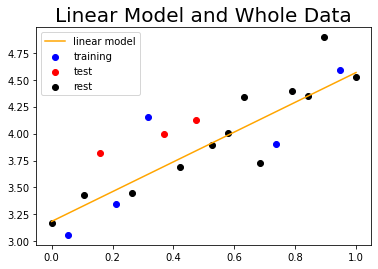

In [ ]:
plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')

plt.plot(x,y_l,label= 'linear model', c='orange')
plt.title('Linear Model and Whole Data', fontsize=20)
plt.legend();

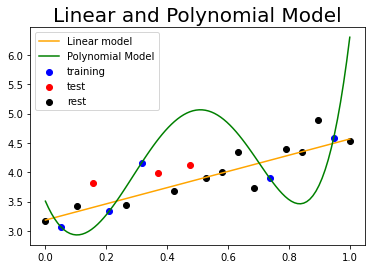

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x_train.reshape(-1,1))

#poly.fit(x_poly, y_train)

lin_poly = LinearRegression()
lin_poly.fit(x_poly, y_train)

x_s = np.linspace(0,1,100)
y_p = lin_poly.predict(poly.fit_transform(x_s.reshape(-1,1)))

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')

plt.plot(x,y_l,label= 'Linear model', c='orange')
plt.plot(x_s,y_p, label='Polynomial Model', c='g')
plt.title('Linear and Polynomial Model', fontsize=20)
plt.legend();

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(go.Scatter(x=x_train, y=y_train, mode='markers',  marker=dict(color='blue', size=20), name="training")  )
fig.add_trace(go.Scatter(x=x_test, y=y_test, mode='markers',marker=dict(color='red'),  name="test")  )
fig.add_trace(go.Scatter(x=x_rest, y=y_rest, mode='markers', marker=dict(color='black'),  name="rest")  )
fig.add_trace(go.Scatter(x=x, y=y_l, marker=dict(color='orange'), name="Linear Model")  )
fig.add_trace(go.Scatter(x=x_s, y=y_p, marker=dict(color='green'), name="Polynomial Model")  )


fig.update_layout(title_text="Linear and Polynomial Model")


# Split data into Training and Test data
- Use train_test_split method
- Split arrays random train and test subsets
- Parameters
  random_state: controls shuffling applied to the data
  test_size: ration od test to whole data


Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# upload breast cancer data
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# X, y and the shapes
X = dataset.data
y =  dataset.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# train shapes
X_train.shape, y_train.shape

((381, 30), (381,))

In [ ]:
# test shapes
X_test.shape, y_test.shape

((188, 30), (188,))

# k-nearest neighbors (kNN)
- Simplest algorithm
- Most important parameter
    - n_neighbors: Number of neighbors to be used
- Task Types: classification and regression
- Classification: voting by considering closest n_neighbors points.
-  Regression: average of closest n_neighbors points.



Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## kNN Classifier

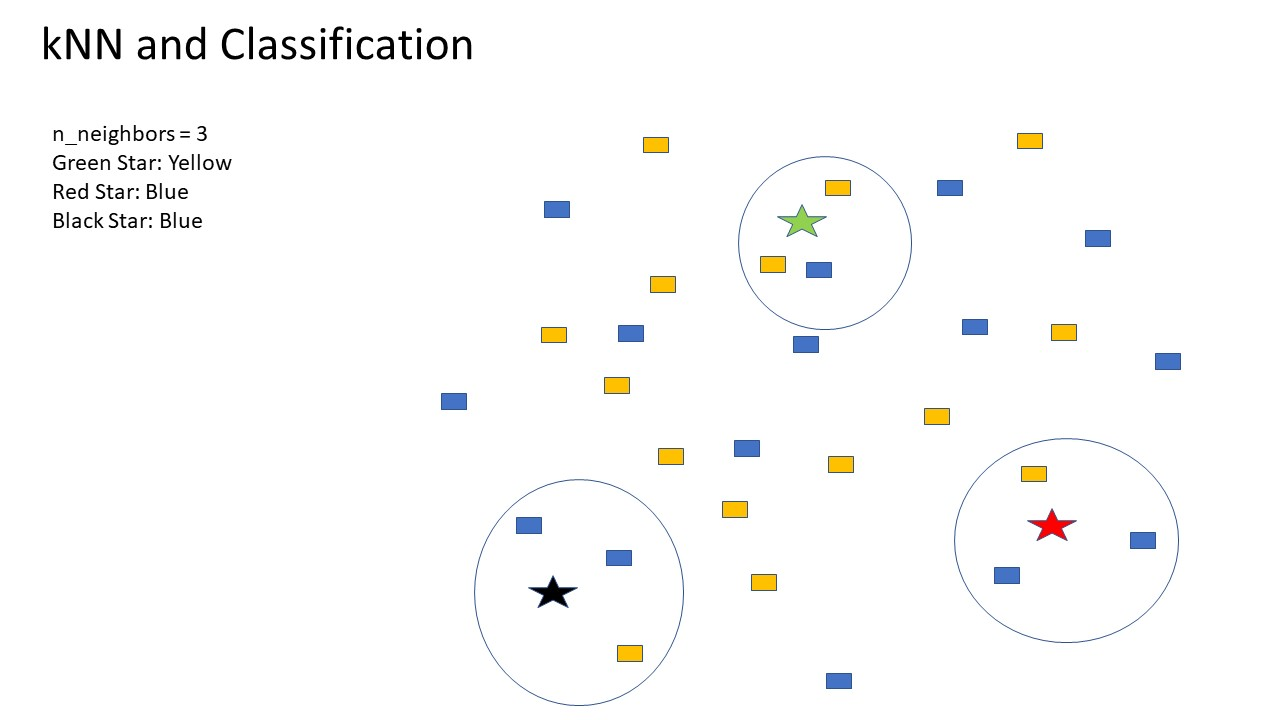

In [ ]:
# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# help
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.NeighborsBase, sklearn.neighbors._base.KNeighborsMixin, sklearn.neighbors._base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse o

In [ ]:
# instantiate the class into an object
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:

# training score
knn.score(X_train,y_train)

1.0

In [ ]:
# test score
knn.score(X_test,y_test)

0.9308510638297872

In [ ]:
# predict X_test
y_predict = knn.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# actual y_test
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
#n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
# training score
knn.score(X_train,y_train)

0.9448818897637795

In [ ]:
# test score
knn.score(X_test,y_test)

0.9414893617021277

In [ ]:
#n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
# training score
knn.score(X_train,y_train)

0.9606299212598425

In [ ]:
# test score
knn.score(X_test,y_test)

0.9202127659574468

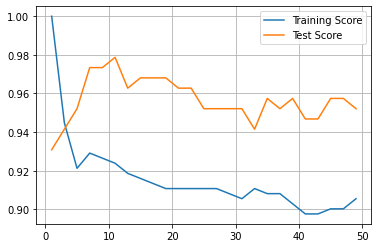

In [ ]:
# training and test scores as n_neighbors changes
N = 50
train_score = []
test_score  = []
for i in range(1,N,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))
plt.plot(range(1,N,2),train_score, label='Training Score')
plt.plot(range(1,N,2),test_score, label='Test Score')
plt.grid()
plt.legend();

## kNN Regressor

In [ ]:
# import boston housing data
from sklearn.datasets import load_boston
dataset = load_boston()

In [ ]:
# X,y and shapes
X = dataset.data
y=  dataset.target
X.shape, y.shape

((506, 13), (506,))

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# training shapes
X_train.shape, y_train.shape

((339, 13), (339,))

In [ ]:
# test shapes
X_test.shape, y_test.shape

((167, 13), (167,))

In [ ]:
# import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# instantiate the class into an object
knn = KNeighborsRegressor(n_neighbors=1)

In [ ]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [ ]:
# training score
knn.score(X_train,y_train)

1.0

In [ ]:
# test score
knn.score(X_test,y_test)

0.4175590346454999

In [ ]:
# predicted values for X_test
y_predict = knn.predict(X_test)
y_predict

array([21.6, 33.1, 15.2, 21.7, 21.7, 50. , 19.6, 13.3, 20.2, 17.5, 23. ,
       15. ,  8.4, 24.5, 29.9, 23.2, 20.5, 11.9, 37.3, 11.5, 35.1, 33.1,
       13.6, 20.6, 14.9, 15.2, 24.5, 13.4, 23. , 17.5, 23.8, 27.1, 12.7,
       50. , 27.9, 25. , 26.6, 19. , 20. , 21.7, 17.5, 33.4, 44. , 22. ,
       28.7,  8.5, 13.6, 21.7, 20. , 20.1, 15. , 35.1, 21.7, 27.5, 50. ,
       20.6,  8.5, 37.3, 22.2, 20.5, 19.6, 27.9, 46.7, 14.8, 29.8, 23. ,
        8.5, 28. , 34.9, 13.5, 21.2, 25. , 16.3, 18.2, 24.5,  5.6, 19.3,
       44. ,  7.2,  8.1, 22. , 14.9, 21.9, 11.3, 23.8, 24. , 14.9, 22.2,
       28. , 19.2, 22.2, 23.1, 19.2, 17.5, 21.9, 18.4, 50. ,  7.2,  7.5,
       11.8, 22.2, 24.5, 15.2, 20.4, 23.7, 13.5, 23.1, 23.9, 22.2, 21.9,
        8.3, 16.3, 22.2, 37.2, 31.7, 13.4, 26.4, 14.8, 21.2, 23.7, 20.5,
       26.2, 15. , 22.8, 26.6, 22.2, 24.1, 32.5, 13.1, 33. , 17.3, 19.3,
       13.6, 18.8, 15.4, 11. , 22.2, 44. , 31.1, 19.6, 18.2, 29. , 33.3,
       23. ,  6.3, 33.8, 22.3, 15.4, 21.7, 44.8, 11

In [ ]:
# actual y_test
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

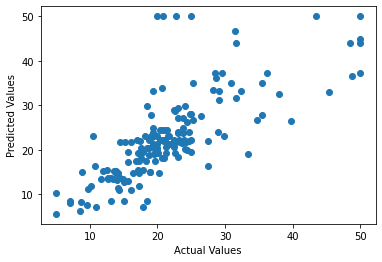

In [ ]:
# plot actual and predicted values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

In [ ]:
# n_neighbors=3
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# fit the model
knn.fit(X_train,y_train)

In [ ]:
# training score
knn.score(X_train,y_train)

0.7338265430143227

In [ ]:
# test score
knn.score(X_test,y_test)

0.6142568210665578

In [ ]:
# n_neighbors=5
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# fit the model
knn.fit(X_train,y_train)

In [ ]:
# training score
knn.score(X_train,y_train)

0.6422976625417653

In [ ]:
# test score
knn.score(X_test,y_test)

0.5748334691810936

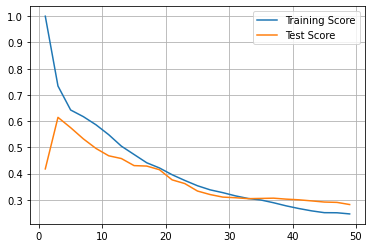

In [ ]:
# training and test scores as n_neighbors changes

N = 50
train_score = []
test_score  = []
for i in range(1,N,2):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))
plt.plot(range(1,N,2),train_score, label='Training Score')
plt.plot(range(1,N,2),test_score, label='Test Score')
plt.grid()
plt.legend();

In [ ]:
# argsort
np.argsort(test_score)

array([24, 23, 22, 21, 20, 19, 16, 17, 18, 15, 14, 13, 12, 11, 10,  9,  0,
        8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
# maximum test score
test_score[1]

0.6142568210665578